- gpu >>>>> cpu 속도..성능...

In [ ]:
# 교통 신호를 분류, 예측해보자!
# 이미 잘 짜여진 모델인 lesnet을 활용해서!

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # 주피터로 하면 이런 과정 필요없지만.. 오래걸릴거임!(런타임.. gpu바꾸고 하기!!)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.getcwd() # 현재 경로

'/content'

In [ ]:
# 옆에 폴더 클릭해서 폴더, 파일 찾고 경로 복사하면 됨!
# 자신이 구글 드라이브에 업로드 한 파일의 경로를 넣어주세요.
data_path = '/content/drive/MyDrive/8_DL/data' 

In [ ]:
import os
# Get the list of all files and directions
dir_list = os.listdir(data_path)
dir_list

['valid.p', 'test.p', 'train.p']

# Import Library

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pickle # 데이터 저장하는 형태 중 하나 / csv나..이런것처럼.. (.p, .pickle) >> 컴퓨터가 잘 이해하는?! 찾아보기!
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
# 43개의 traffic sign 예측한 결과, 라벨, 정답
label = {
0  : 'Speed limit (20km/h)',
1  : 'Speed limit (30km/h)',
2  : 'Speed limit (50km/h)',
3  : 'Speed limit (60km/h)',
4  : 'Speed limit (70km/h)',
5  : 'Speed limit (80km/h)',
6  : 'End of speed limit (80km/h)',
7  : 'Speed limit (100km/h)',
8  : 'Speed limit (120km/h)',
9  : 'No passing',
10 : 'No passing for vehicles over 3.5 metric tons',
11 : 'Right-of-way at the next intersection',
12 : 'Priority road',
13 : 'Yield',
14 : 'Stop',
15 : 'No vehicles',
16 : 'Vehicles over 3.5 metric tons prohibited',
17 : 'No entry',
18 : 'General caution',
19 : 'Dangerous curve to the left',
20 : 'Dangerous curve to the right',
21 : 'Double curve',
22 : 'Bumpy road',
23 : 'Slippery road',
24 : 'Road narrows on the right',
25 : 'Road work',
26 : 'Traffic signals',
27 : 'Pedestrians',
28 : 'Children crossing',
29 : 'Bicycles crossing',
30 : 'Beware of ice/snow',
31 : 'Wild animals crossing',
32 : 'End of all speed and passing limits',
33 : 'Turn right ahead',
34 : 'Turn left ahead',
35 : 'Ahead only',
36 : 'Go straight or right',
37 : 'Go straight or left',
38 : 'Keep right',
39 : 'Keep left',
40 : 'Roundabout mandatory',
41 : 'End of no passing',
42 : 'End of no passing by vehicles over 3.5 metric tons'}

# Read Data

In [ ]:
with open(f"{data_path}/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open(f"{data_path}/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open(f"{data_path}/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [ ]:
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [ ]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [ ]:
print(X_train.shape)
print(y_train.shape)

(34799, 32, 32, 3)
(34799,)


Text(0.5, 1.0, 'Go straight or right')

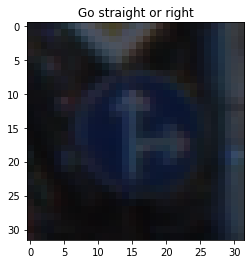

In [ ]:
plt.imshow(X_train[1004])
plt.title(f'{label[y_train[1004]]}')

# 데이터 전처리

In [ ]:
# 명암을 비교해서 봐야되면 >>> 컬러보단 그레이 스케일로 보는게 좋을듯..()
# 색에 대한 정보보다는 선의 경계가 중요할 때는 >> 컬러보다 그레이
# 이런 의사결정이 좋을듯!
# 데이터가 많으면 많을수록 컬러가 좋겠지만.. 오버피팅이 날수도 있음.. 일반화가 안됨(노란색에 검은색 화살표일때 틀리면..)

# 이런 의사결정, 생각을 계속 해야 됨!

In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train) # 모델이 순서조차조 학습할 수 있어서 shuffle로 섞어주는게 좋음!

In [ ]:
# 데이터 10000개 (A,B) > 정답이 2개라는거!
# A: 9000개, B: 1000개
# 이런 경우에 모델은 A로만 예측해도 90% 나온다.
# 근데 지금상태에서는 B를 예측 잘 못함
# A를 1000개만 사용해서 B랑 데이터양 같게 학습하면 어느하나 치우치지 않고 모델이 잘 예측하게 할 수 있음(A에 너무 치우쳐서 학습하니까)
# A를 1000개 해서 비슷한 비율로 

# 이게 아니라.. 모델이 A라고 하면 일단 정확도가 90%가 나오니까.... A라고 하면 암튼 90%가 맞는거니까.. 이런것까지 모델이 학습함.. wow...

In [ ]:
X_train.shape

# 3개 채널
# R(0~255)
# G(0~255)
# B(0~255)

# Gray(0~255)

# 다 더해서 3으로 나눠주면 됨

(34799, 32, 32, 3)

In [ ]:
# gray scaling
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray = np.sum(X_validation/3, axis=3, keepdims=True)

In [ ]:
X_train_gray.shape

(34799, 32, 32, 1)

In [ ]:
# normalization
X_train_gray_norm = X_train_gray / 255
X_test_gray_norm = X_test_gray / 255
X_validation_gray_norm = X_validation_gray / 255 

Text(0.5, 1.0, '')

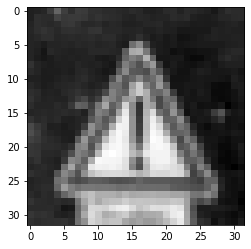

In [ ]:
idx = 1004
plt.imshow(X_train_gray_norm[idx], cmap='gray')
plt.title(f'')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

cnn_model = Sequential() # 모델의 도화지 같은.. 역할
cnn_model.add(Conv2D(6, (5, 5), activation = 'relu', input_shape = (32,32,1)))  # X_train_gray.shape 이거에 맞게 input_shape넣어주기! # f=filtersize, s=stride, p=pooling
cnn_model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
cnn_model.add(Conv2D(16, (5, 5), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(120, activation = 'relu'))
cnn_model.add(Dense(84, activation = 'relu'))
cnn_model.add(Dense(43, activation = 'softmax'))

cnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 400)               0         
                                                                 
 dense_12 (Dense)            (None, 120)              

In [ ]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy',
                  optimizer = Adam(learning_rate=0.001), metrics = ['accuracy'])

In [ ]:
history = cnn_model.fit(X_train_gray_norm, y_train,
                        batch_size=512,
                        epochs=50,
                        verbose=1,
                        validation_data=(X_validation_gray_norm, y_validation))

Epoch 1/50
68/68 [==============================] - 12s 12ms/step - loss: 3.3856 - accuracy: 0.1354 - val_loss: 3.0103 - val_accuracy: 0.2624
Epoch 2/50
68/68 [==============================] - 0s 7ms/step - loss: 2.0308 - accuracy: 0.4601 - val_loss: 1.6246 - val_accuracy: 0.5696
Epoch 3/50
68/68 [==============================] - 0s 7ms/step - loss: 1.1268 - accuracy: 0.6840 - val_loss: 1.0878 - val_accuracy: 0.7070
Epoch 4/50
68/68 [==============================] - 0s 7ms/step - loss: 0.7577 - accuracy: 0.7985 - val_loss: 0.8490 - val_accuracy: 0.7887
Epoch 5/50
68/68 [==============================] - 0s 6ms/step - loss: 0.5598 - accuracy: 0.8549 - val_loss: 0.7228 - val_accuracy: 0.8252
Epoch 6/50
68/68 [==============================] - 0s 6ms/step - loss: 0.4317 - accuracy: 0.8913 - val_loss: 0.6877 - val_accuracy: 0.8372
Epoch 7/50
68/68 [==============================] - 0s 6ms/step - loss: 0.3531 - accuracy: 0.9137 - val_loss: 0.5983 - val_accuracy: 0.8599
Epoch 8/50
68/68 [

# 모델평가

In [ ]:
model_score = cnn_model.evaluate(X_train_gray_norm, y_train) # train

1088/1088 [==============================] - 3s 3ms/step - loss: 0.0039 - accuracy: 0.9998


In [ ]:
model_score = cnn_model.evaluate(X_test_gray_norm, y_test) # test

395/395 [==============================] - 1s 3ms/step - loss: 1.2400 - accuracy: 0.9040


- 오버피팅이라고 할 수도 있음
- dropout해주면 됨!

In [ ]:
history.history.keys() # 저장된거

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

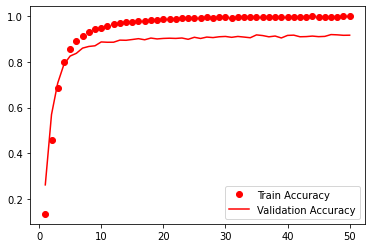

In [ ]:
plt.plot(epochs, acc, 'ro', label = 'Train Accuracy') # ro > 빨간색 동그라미
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.legend()

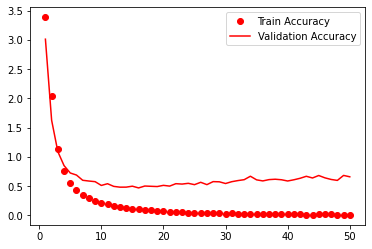

In [ ]:
plt.plot(epochs, loss, 'ro', label = 'Train Accuracy') # ro > 빨간색 동그라미
plt.plot(epochs, val_loss, 'r', label = 'Validation Accuracy')
plt.legend()

In [ ]:
# confusion matrix 그려주자!
prediction_score = cnn_model.predict(X_test_gray_norm)
prediction_score

395/395 [==============================] - 2s 5ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.3239994e-18,
        1.9461959e-23, 1.2373813e-20],
       [3.5764683e-07, 9.9999964e-01, 1.1258683e-19, ..., 5.5487847e-26,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.6557788e-05, 1.9063413e-04, 8.2790990e-05, ..., 1.2573832e-10,
        2.0740183e-04, 1.2723088e-07],
       [5.0844906e-10, 5.8198941e-04, 3.1455102e-06, ..., 1.4561568e-03,
        3.4922271e-06, 3.5351115e-06],
       [4.8607562e-14, 3.3426501e-11, 4.8070036e-05, ..., 5.4042398e-06,
        2.0652796e-14, 2.5478522e-15]], dtype=float32)

In [ ]:
prediction_score.shape # softmax니까 확률로 나오고, 1에 가장 가까운데 결과물들의 클래스!

(12630, 43)

In [ ]:
prediction_classes = prediction_score.argmax(axis=1)
prediction_classes

array([16,  1, 38, ...,  8,  7, 10])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_classes)
cm

array([[ 37,  12,   0, ...,   0,   0,   0],
       [  3, 691,   6, ...,   7,   0,   0],
       [  0,  22, 706, ...,   3,   0,   0],
       ...,
       [  0,   1,   1, ...,  65,   0,   0],
       [  0,   0,   0, ...,   0,  42,   0],
       [  0,   0,   0, ...,   0,   1,  89]])

<AxesSubplot:>

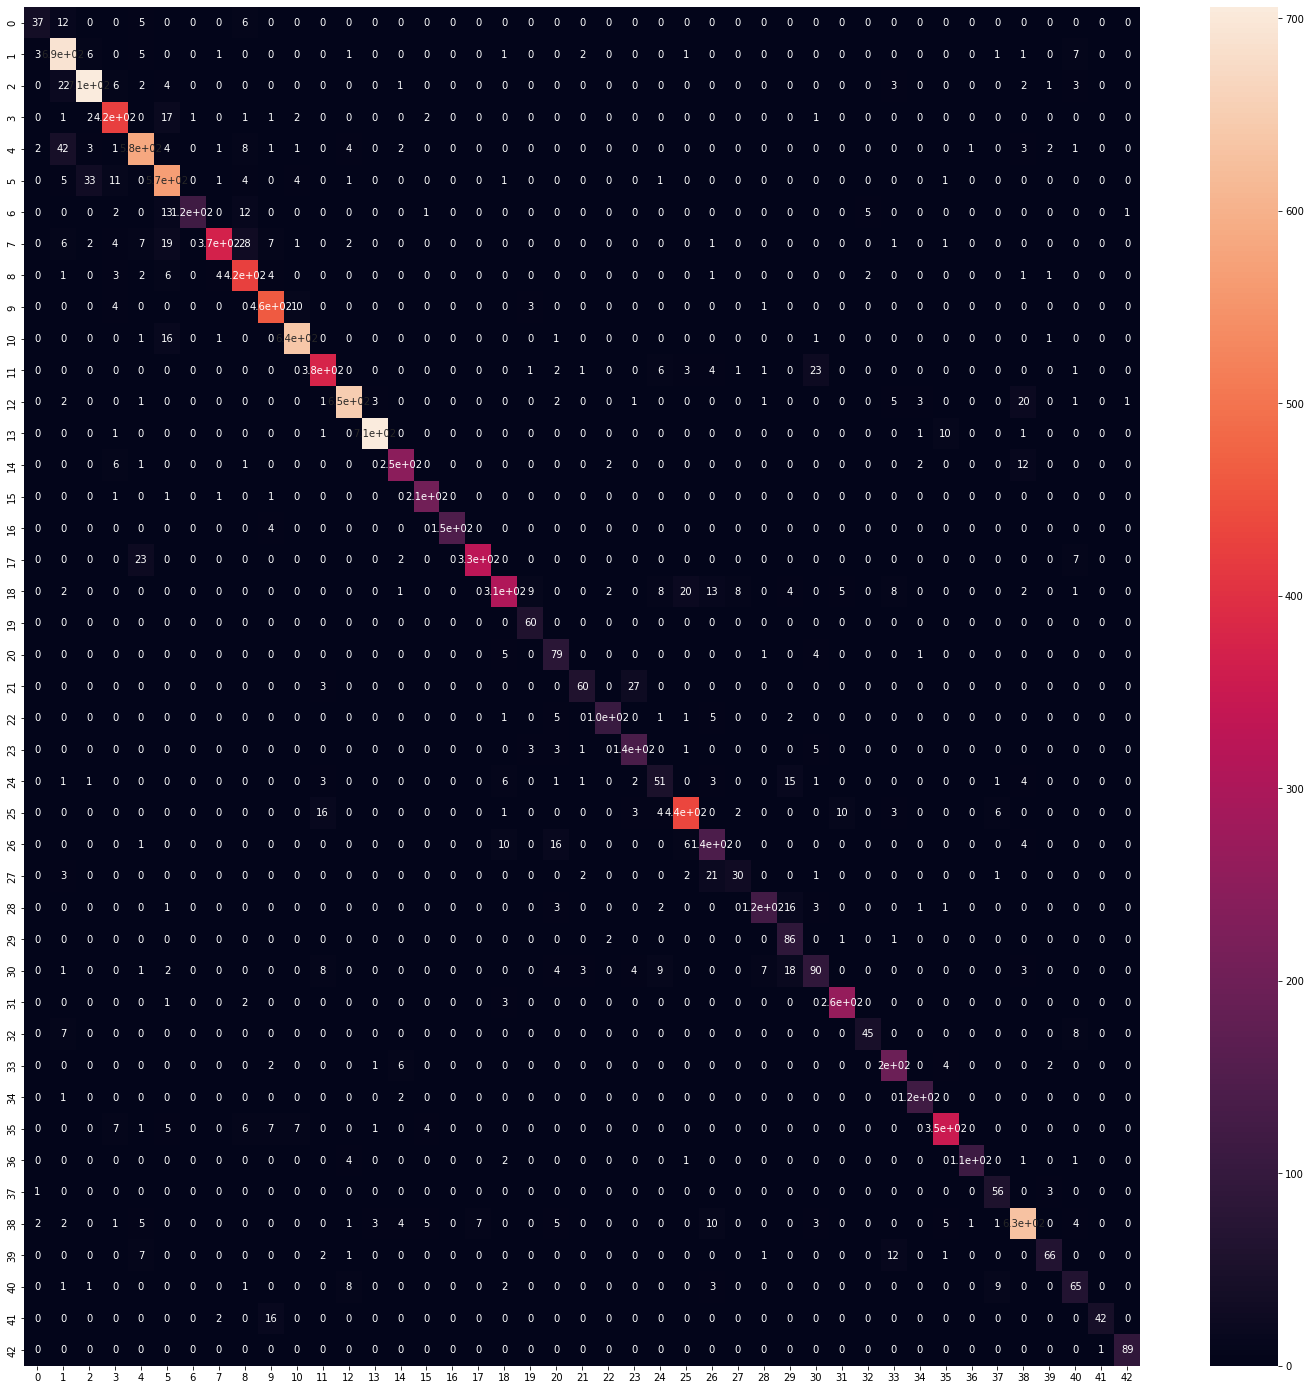

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(cm, annot=True) # 어두운 색에 가까울수록 잘 맞추지 못함

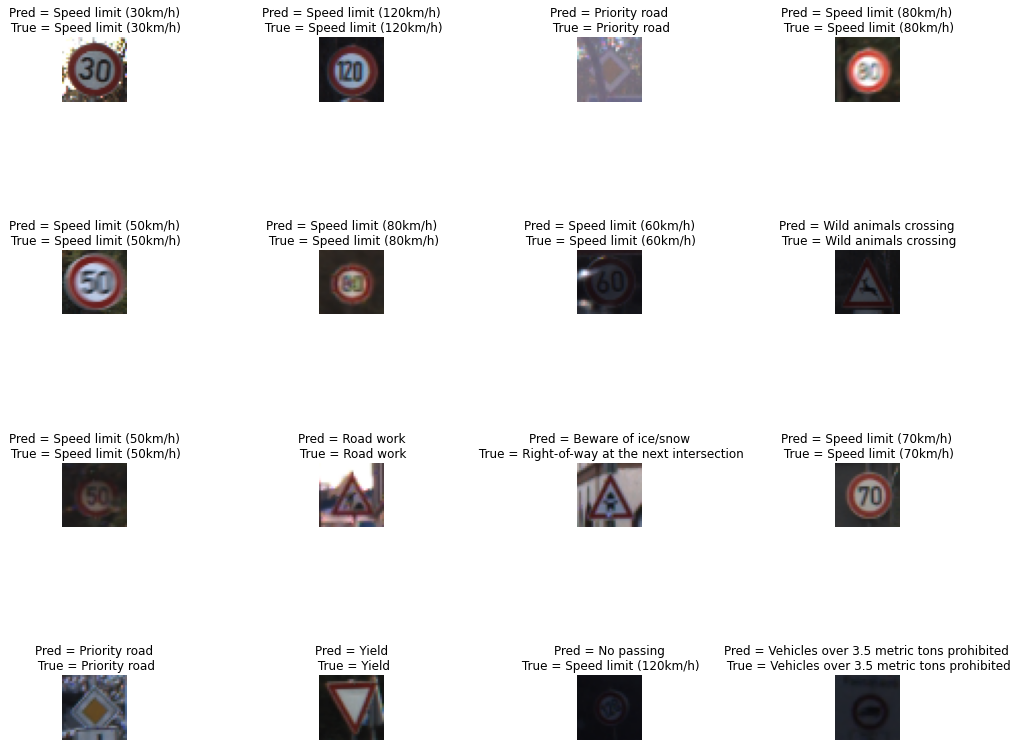

In [ ]:
X_size = 4
Y_size = 4
fig, axes = plt.subplots(X_size, Y_size, figsize = (15,15))
axes = axes.ravel()

for i in range(len(axes)):
  index = np.random.randint(0, len(prediction_classes))
  axes[i].imshow(X_test[index])
  predictioin_result = label[prediction_classes[index]] # 예측결과
  real = label[y_test[index]]
  axes[i].set_title(f'Pred = {predictioin_result}\n True = {real}')
  axes[i].axis('off')

plt.subplots_adjust(wspace = 3) # 글씩 겹치고.. 사이즈 잘 안맞으면 이거랑 맨위에 X,Y_size 조정해주면 됨!